In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import spacy

nlp = spacy.load("pl_core_news_md")

In [2]:
df = pd.read_csv("klej_polemo2.0-in/dev.tsv", sep="\t")
corpus = df["sentence"].tolist()
doc_corpus = list(nlp.pipe(corpus, disable=["ner"]))
norm_corpus = [[token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop] 
               for doc in doc_corpus]

In [3]:
vect = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, 
                       max_df=0.95, min_df=0.02)
dtm = vect.fit_transform(norm_corpus)
feature_names = vect.get_feature_names()

# Grupowanie

## K-means

1. ustal liczbę klastrów

2. ustal centroidy

3. oblicz odległość obiektów od centroidów

4. przypisz obiekty do klastra

5. ustal nowe centroidy

6. wykonuj kroki 3-5 do osiągnięcia wartunku stopu

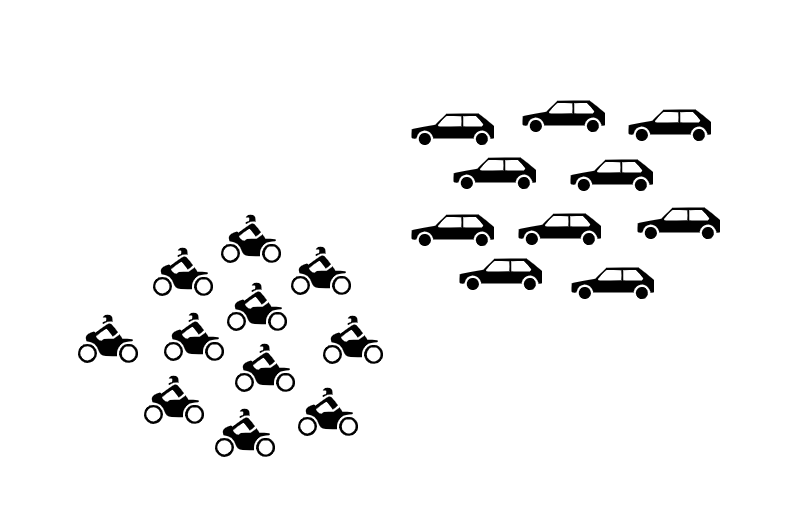

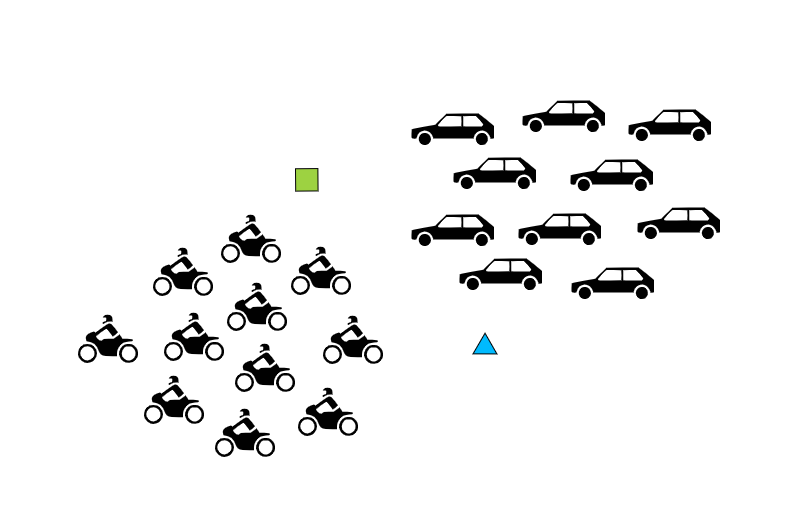

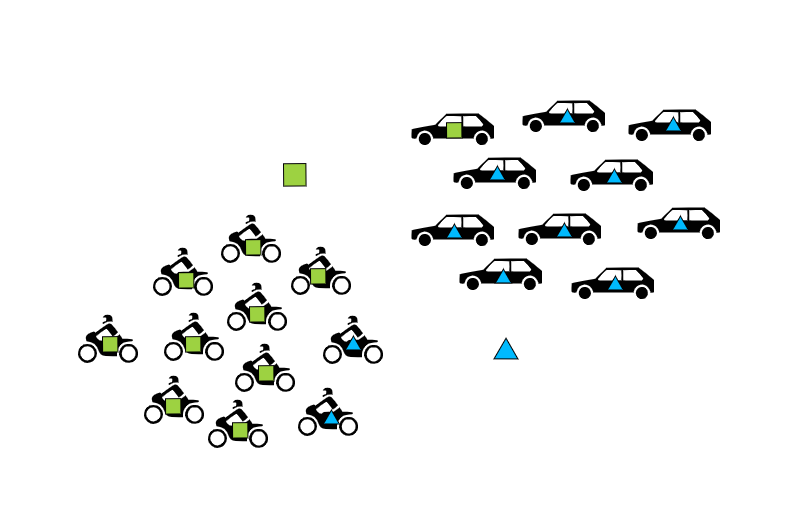

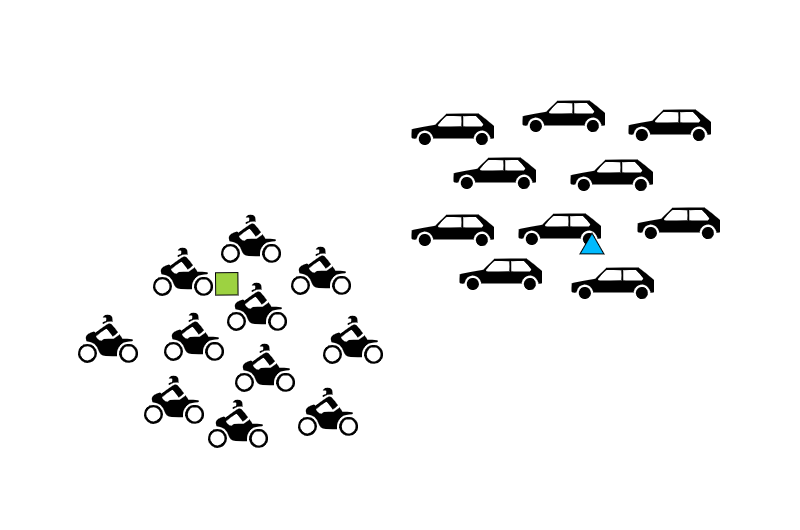

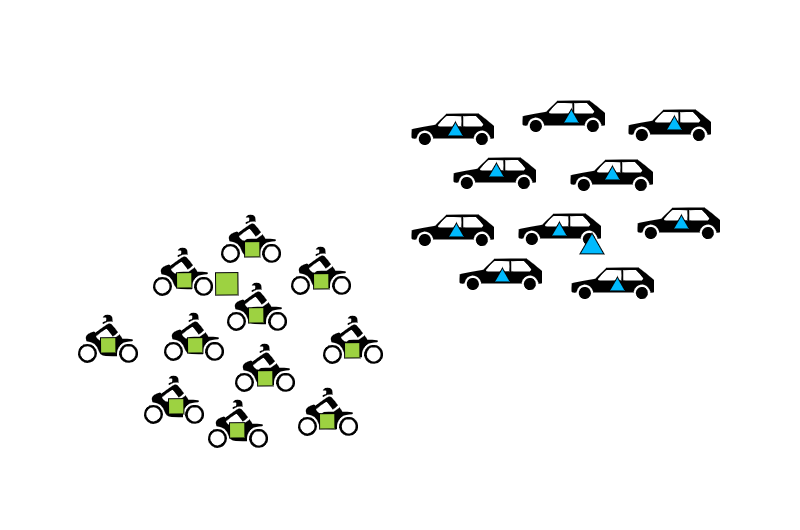

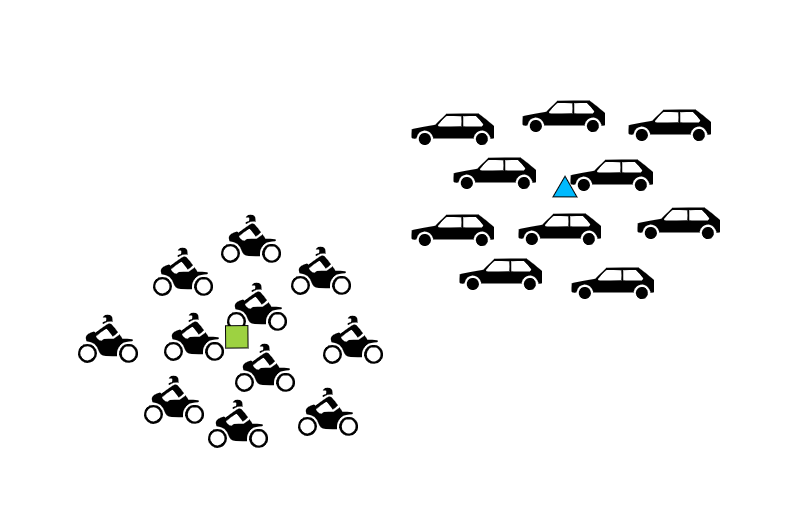

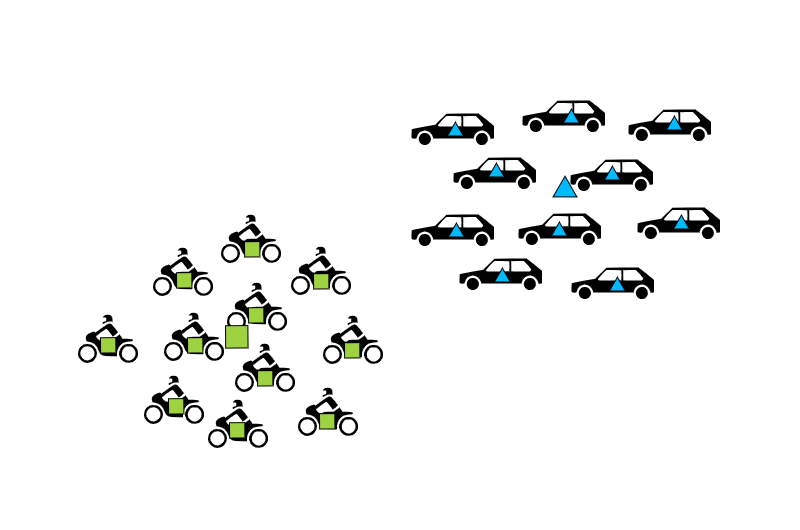

In [4]:
from sklearn.cluster import KMeans
from collections import Counter

In [5]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)

In [6]:
kmeans.fit(dtm)

KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [7]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
Counter(kmeans.labels_)

Counter({0: 334, 1: 389})

In [9]:
kmeans.cluster_centers_

array([[0.        , 0.00793486, 0.00069215, 0.02225954, 0.05934724,
        0.        , 0.        , 0.00043512, 0.00222083, 0.00111669,
        0.00747544, 0.00408673, 0.        , 0.00056605, 0.00628872,
        0.01515031, 0.01194576, 0.00222547, 0.00582195, 0.01804533,
        0.00471979, 0.0191802 , 0.03367266, 0.01577414, 0.01213369,
        0.00707505, 0.00183734, 0.00209733, 0.0217855 , 0.01839274,
        0.00057173, 0.02445743, 0.00872263, 0.01170997, 0.01257841,
        0.01321943, 0.        , 0.00066331, 0.00248817, 0.00638424,
        0.02280925, 0.00790769, 0.00742671, 0.00125668, 0.00807183,
        0.00862608, 0.01979593, 0.01321298, 0.02998059, 0.00894093,
        0.00725338, 0.00622823, 0.01292512, 0.        , 0.07677408,
        0.03734577, 0.01609282, 0.0062259 , 0.01490516, 0.01289289,
        0.00507405, 0.00954549, 0.00771897, 0.06153333, 0.00531916,
        0.00354091, 0.01447312, 0.00226655, 0.0140745 , 0.00832967,
        0.01108798, 0.00582624, 0.03491906, 0.00

In [10]:
kmeans.cluster_centers_.shape

(2, 494)

In [11]:
def get_top_features(cluster_centers, feature_names, top_n):
    ordered_features = cluster_centers.argsort()[:, ::-1][:, :top_n]
    top_feat_names = [[feature_names[idx] for idx in feat_vect] for feat_vect in ordered_features]
    return np.array(top_feat_names)

In [12]:
top_features = get_top_features(kmeans.cluster_centers_, feature_names, 20)

In [13]:
top_features

array([['m', 'doktor', 'wizyta', 'lekarz', 'dr', 'badanie', 'pacjent',
        'leczenie', 'doktór', 'lek', 'dziecko', 'choroba', 'rok',
        'dobry', 'szpital', 'móc', 'em', 'problem', 'pierwszy',
        'polecać'],
       ['hotel', 'pokój', 'obsługa', 'miejsce', 'śmy', 'dobry',
        'jedzenie', 'brak', 'śniadanie', 'restauracja', 'basen',
        'obiekt', 'cena', 'polecać', 'gość', 'łazienka', 'dziecko',
        'duży', 'm', 'pobyt']], dtype='<U11')

In [14]:
pd.DataFrame(top_features.T)

,0,1
0,m,hotel
1,doktor,pokój
2,wizyta,obsługa
3,lekarz,miejsce
4,dr,śmy
5,badanie,dobry
6,pacjent,jedzenie
7,leczenie,brak
8,doktór,śniadanie
9,lek,restauracja


In [15]:
pairs = list(zip(kmeans.labels_, corpus))

In [16]:
pairs[0]

(0,
 'Pani Doktor bardzo miła , ale szkła dobrane mam źle - w gabinecie było ciemno ( nieodpowiednie oświetlenie gabinetu ) , a soczewki których używa okulista w gabinecie do badania ostrości wg mnie są złej jakości . Skończyło się na tym , że wykupiła m receptę na za słabe okulary , bo Pani Doktor powiedziała " że tu jest ciemno i w lepszym świetle będzie Pani lepiej widzieć " , a tak niestety nie jest .')

In [17]:
pairs[1]

(0,
 'Pani doktor jest rzeczowa , odpowiada na każde pytanie konkretnie , nie ogólnikami , co bardzo istotne . Spodobało mi się również podczas wizyty u Pani , jej szczera opinia i podejście do badań , szczególnie do ogromu badań ( często niepotrzebnych ) zlecanych przez prywatnych ginekologów . Sama była m w poprzednim miejscu zamieszkania pacjentką prywatnego gabinetu i wiem jak z ilością badań wyglądało ( co się wiąże oczywiście z kosztami i to nie małymi niestety ) . Zostało mi wszystko wyjaśnione , otrzymała m odpowiedzi na pytania , badanie przebiegło szybko , rozmowa konkretna . Jedynie czego mi brakowało to może większego uśmiechu czy sympatii do pacjenta .')

In [18]:
pairs[-1]

(1,
 'W hotelu zatrzymali śmy się w drodze do W - wy . Pomimo lokalizacji ( wylot na W - we ) pokoje ciche i wygodne . Czysto i świeżo . Na dole restauracja w której jedli śmy późny obiad i rano śniadanie . Posiłki zasługują na wyróżnienie bo kuchnia bogata w regionalne polskie potrawy i bardzo smaczna : )')

In [19]:
pairs[-2]

(1,
 'Po przyjeździe na podany adres okazuje się , że nie ma dla nas miejsca pod tym adresem jako że miał miejsce jakiś problem z systemem i nasz pokój został już oddany . Personel profesjonalny ale wygląda na totalnie zagubiony i przemęczony . Zostali śmy poinformowani , że zostaniemy przeniesieni do prywatnego apartamentu na ul . Foksal 17b przy Nowym Świecie w centrum Warszawy . Niechętnie , ale z braku opcji zgodzili śmy się . Pani na recepcji opisywała to miejsce w superlatywach . Podano nam adres , dano klucze i tyle - żadnej formy transportu czy chęci pomocy w pokryciu kosztów związanych z transportem . Był em w szoku . Na nasze szczęście znajomy miał auto i znał okolice więc z dotarciem na miejsce nie było większych problemów . Na miejscu okazuje się , że apartament to zwykły pokój z kuchnią razem tak wielki że po wstawieniu walizek nie zostaje wiele miejsca . Łazienka oddzielona zasuwanymi drzwiami co nie daje żadnej prywatności . Czystość pozostawia też sporo do życzenia . Po